# Sensitivitätsanalyse

Open in Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/opt2025-de/blob/main/02-Graphical-Method/03-Sensitivity-Analysis.ipynb)



In [5]:
%pip install gurobipy

import pandas as pd
import gurobipy as gp
from gurobipy import GRB

m = gp.Model("Coffee Blending")

x_s = m.addVar(lb=0, name="Super")
x_d = m.addVar(lb=0, name="Deluxe")

m.setObjective(40 * x_s + 50 * x_d, GRB.MAXIMIZE)

# Einschränkungen

c_arabica = m.addConstr(0.5 * x_s + 0.25 * x_d <= 120, "Arabica")
c_robusta = m.addConstr(0.5 * x_s + 0.75 * x_d <= 160, "Robusta")
c_demand = m.addConstr(x_d <= 150, "Nachfrage Deluxe")

m.optimize()


Note: you may need to restart the kernel to use updated packages.
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 5 125U, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 14 logical processors, using up to 14 threads

Optimize a model with 3 rows, 2 columns and 5 nonzeros
Model fingerprint: 0xb45dd709
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 2e+02]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4000000e+04   1.325000e+02   0.000000e+00      0s
       2    1.2000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.200000000e+04


In [4]:
# Schreibt das Modell in eine Datei
m.write("CoffeeBlending.lp")

# Hier öffnen wir die Datei und geben den Inhalt aus
with open("CoffeeBlending.lp") as f:
    print(f.read())


\ Model Coffee Blending
\ LP format - for model browsing. Use MPS format to capture full model detail.
Maximize
  40 Super + 50 Deluxe
Subject To
 Arabica: 0.5 Super + 0.25 Deluxe <= 120
 Robusta: 0.5 Super + 0.75 Deluxe <= 160
 Nachfrage_Deluxe: Deluxe <= 150
Bounds
End



## Zugriff auf die Lösung


 Nachdem `.optimize()` gelaufen ist, enthält das Modellobjekt (in unserem Fall heißt es `m`) die Lösung (falls es eine gibt). Nun möchten wir auf die Lösung zugreifen

- `x_s.VarName` enthält den Namen der Variable `x_s`
- `x_d.VarName` enthält den Namen der Variable `x_d`
- `x_s.x` enthält den Wert der Variable `x_s` in der Lösung
- `x_d.x` enthält den Wert der Variable `x_d` in der Lösung
- `x_s.RC` (reduced cost) enthält die Opportunitätskosten der Variable `x_s` in der Lösung
- `x_d.RC` (reduced cost) enthält die Opportunitätskosten der Variable `x_d` in der Lösung
- `m.objVal` (objective value) enthält den Wert der Zielfunktion in der Lösung


Weitere Eigeschanften und Methoden der Variablen können Sie [hier](https://docs.gurobi.com/projects/optimizer/en/current/reference/attributes/variable.html) finden.


In [ ]:
print(f"{x_s.VarName} = {x_s.x}, RC = {x_s.RC}")
print(f"{x_d.VarName} = {x_d.x}, RC = {x_d.RC}")
print(f"Profit = {m.objVal}")


Super = 200.0, RC = 0.0
Deluxe = 80.0, RC = 0.0
Profit = 12000.0


Die Einschränkungen können auf ähnliche Art und Weise abgerufen werden. Hier werden wir drei eigenschaften von Einschränkungen verwenden:

- `pi` enthält den Wert des Schattenpreises (der interne Wert) der Resourcenbeschränkung in der Lösung
- `slack` enthält den Wert des Slacks für die Einschränkung in der Lösung
- `SARHSLow` und `SARHSUp` enthalten den minimalen bzw. maximalen Wert der rechten Seite der Einschränkung, die die Gültigkeit der aktuellen Lösung nicht beeinträchtigen würde.


In [29]:
print(f"{c_arabica.ConstrName}: Slack = {c_arabica.slack}, Dual = {c_arabica.pi}, Lower = {c_arabica.SARHSLow}, Upper = {c_arabica.SARHSUp}")
print(f"{c_robusta.ConstrName}: Slack = {c_robusta.slack}, Dual = {c_robusta.pi}, Lower = {c_robusta.SARHSLow}, Upper = {c_arabica.SARHSUp}")
print(f"{c_demand.ConstrName}: Slack = {c_demand.slack}, Dual = {c_demand.pi}, Lower = {c_demand.SARHSLow}, Upper = {c_demand.SARHSUp}")


Arabica: Slack = 0.0, Dual = 19.99999999999999, Lower = 85.0, Upper = 160.0
Robusta: Slack = 0.0, Dual = 60.00000000000001, Lower = 120.0, Upper = 160.0
Nachfrage Deluxe: Slack = 70.0, Dual = 0.0, Lower = 80.0, Upper = inf


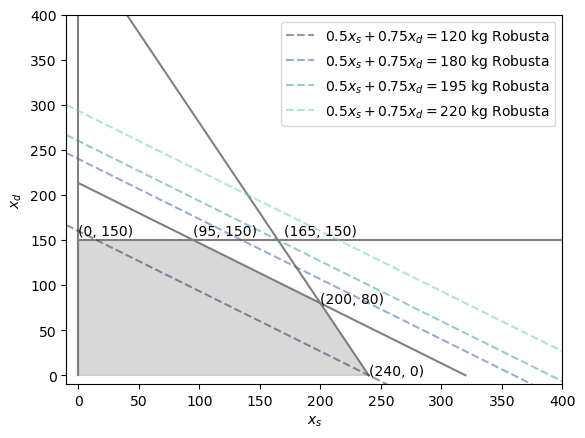

In [30]:
#| label: fig-coffe-restr-var-robusta
#| fig-cap: "Die zulässige Menge für verschiedene Werte der Robusta Verfügbarkeit."
#| fold-code: true

import matplotlib.pyplot as plt
import seaborn as sns

plt.plot([0, 240], [480, 0], color='grey')
plt.plot([0, 320], [213.33, 0], color='grey')
plt.plot([0, 0], [0, 150], color='grey')
plt.plot([0, 400], [150, 150], color='grey')
plt.plot([0, 0], [0, 500], color='grey')

plt.fill([0, 0, 95, 200, 240], [0, 150, 150, 80, 0], color='grey', alpha=0.3)

plt.xlim(-10, 400)
plt.ylim(-10, 400)

plt.xlabel(r'$x_s$')
plt.ylabel(r'$x_d$')

palette = sns.color_palette("mako", n_colors=4).as_hex()

for idx, q in enumerate([120, 180, 195, 220]):
    plt.axline([0, q / 0.75], slope=-0.5/0.75,
               label=fr"$0.5 x_s + 0.75 x_d = {q}$ kg Robusta",
               linestyle='--', 
               color=palette[idx],
               alpha=0.5
               )

plt.text(0, 155, f"({0}, {150})")
plt.text(95, 155, f"({95}, {150})")
plt.text(200, 80, f"({200}, {80})")
plt.text(240, 0, f"({240}, {0})")
plt.text(170, 155, f"({165}, {150})")

plt.legend(loc=0)

Aus der Grafik sehen wir, dass bei einer Robusta-Menge von mehr als 195 kg der Charakter des Optimums geändert wird, da die Ressourcen "Arabica" und "Deluxe-Nachfrage" ausgeschöpft werden. Der Unterschied zwischen 195 kg und den ursprünglich verfügbaren 160 kg in der Aufgabe nennen wir zulässige Erhöhung der Ressource (195 - 160 = 35 kg). Das neue Optimum ist der Schnittpunkt von "Arabica" und "Deluxe-Nachfrage". Wir können die Koordinaten dieses Punktes finden, indem wir das System der beiden Gleichungen für die Geraden "Arabica" und "Deluxe-Nachfrage" lösen:

$$
\begin{align*}
0.5 x_1 + 0.25 x_2 & = 120  \\
x_2 & = 150
\end{align*}
$$

Die Lösung des Systems ist $x_1 = 165, x_2 = 150$. Im Gegensatz zu den Optima bei 160 kg und 180 kg Robusta sind diesmal "Arabica" und "Deluxe-Nachfrage" die ausgeschöpften Ressourcen. In diesem Produktionsplan erzielt das Unternehmen einen Gewinn von

$$
z(165, 160) = 40 \cdot 165 + 50 \cdot 150 = 14100.
$$


## Schattenpreise

Die Analyse hat uns bisher eine obere Schranke für die Menge an Robusta gezeigt, die das Unternehmen kaufen kann, ohne den Charakter des optimalen Plans zu verändern. Das waren 195 kg Robusta.

Wir können nun die Gewinne der ursprünglichen Aufgabe ($r^* = 160$ kg Robusta) und der Aufgabe mit $r^{*1} = 195$ kg Robusta vergleichen.

$$
\begin{align*}
z^* & = 12000 \\
z^{*1} & = 14100 \\
\Delta z = z^{*1} - z^* & = 14100 - 12000 = 2100
\end{align*}
$$

Diesen zusätzlichen Gewinn von 2100 € haben wir durch eine zusätzliche Menge von 35 kg Robusta-Kaffee erzielt. Das Verhältnis zwischen dem zusätzlichen Gewinn und der zusätzlichen Ressourcenmenge nennen wir den *Schattenpreis* der Ressource (Robusta):

$$
\frac{\Delta z^*}{\Delta r^*} = \frac{z^{*1} - z^{*}}{r^{*1} - r^{*}} = \frac{14100 - 12000}{195 - 160} = \frac{2100}{35} = 60 [€/kg]
$$

- Die Lieferanten bieten an, zusätzliche 10 kg Robusta zu einem Preis von 20 €/kg zu liefern. Würden Sie dem Unternehmen empfehlen, dieses Angebot anzunehmen?
- Das Unternehmen plant, die Nachfrage nach Deluxe-Kaffee um 20 kg zu erhöhen (z. B. durch Werbung). Würden Sie dem Unternehmen empfehlen, diese Entscheidung zu treffen?
- Ein benachbartes Café bietet an, 10 kg Arabica-Kaffee zu einem Preis von 15 €/kg zu kaufen. Würden Sie dem Unternehmen empfehlen, dieses Angebot anzunehmen?
- Der Manager des Cafés schlägt vor, ein neues Produkt einzuführen, das zu einem Preis von nicht weniger als 6 €/kg verkauft werden kann. Für die Herstellung eines Kilogramms dieses neuen Produkts sind 0,7 kg Arabica und 0,3 kg Robusta erforderlich. Würden Sie dem Unternehmen empfehlen, mit der Produktion zu beginnen?

## Lösung mit `Excel`

Ein Beispiel mit Excel können Sie [hier herunterladen](https://github.com/febse/data/raw/main/opt/Problem_2_coffee_blending.xlsx).


## Übungsaufgabe

Ein Metallurgieunternehmen produziert Stahl- und Gusseisenabgüsse auf zwei Maschinen. Die Herstellung eines Stahlabgusses erfordert 2 Stunden auf der ersten Maschine und 1 Stunde auf der zweiten. Die Herstellung eines Gusseisenabgusses erfordert eine Stunde auf der ersten Maschine und drei auf der zweiten. Die Gesamtkapazität der Maschinen beträgt 8 Stunden pro Tag. Das Unternehmen versucht seinen Gewinn zu maximieren, wobei ein Stahlabguss 100 EUR und ein Gusseisenabguss 120 EUR zum Gewinn beiträgt. Wie viele von welcher Art von Abgüssen sollte das Unternehmen produzieren?

$$
\begin{align*}
x_s: & \text{ Anzahl von Stahlabgüssen} \\
x_c: & \text{ Anzahl von Gusseisenabgüssen}
\end{align*}
$$

$$
\max 100x_s + 120x_c \\
$$

$$
\begin{align*}
2 x_s + x_c & \leq 8 \\
x_s + 3x_c & \leq 8 \\
x_s, x_c & \geq 0
\end{align*}
$$

- Benutzen Sie den Normalvektor, um den optimalen Produktionsplan graphisch zu finden.
- In welchen Grenzen kann die Kapazität der Maschinen geändert werden, ohne den Charakter des optimalen Plans zu ändern (welche Resourcen bestimmen den optimalen Plan)?
- Bestimmen Sie die Schattenpreise der Resourcen (beider Maschinen).
- Falls das Unternehmen plant, die Kapazität der Maschinen zu erhöhen, welche Maschine sollte zuerst erweitert werden?
- Das Unternehmen erwägt, ein neues Produkt einzuführen, das 2 Stunden auf der ersten Maschine und 2 Stunden auf der zweiten Maschine benötigt. Der erwartete Gewinn aus dem Verkauf einer Einheit dieses Produkts beträgt 125 €. Würden Sie dem Unternehmen empfehlen, mit der Produktion dieses Produkts zu beginnen?

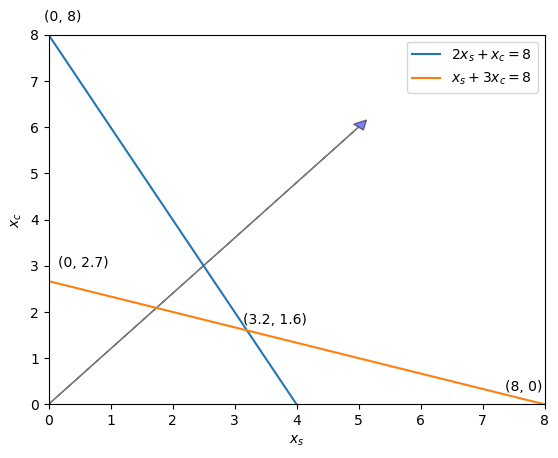

In [31]:
#| fold-code: true

import matplotlib.pyplot as plt

# Define the constraints
x_s = [0, 8]  # Range of x_s values
x_c1 = [0, 8]  # Range of x_c values for constraint 1
x_c2 = [0, 8]  # Range of x_c values for constraint 2

# Plot the constraints
plt.plot(x_s, [8 - 2 * x for x in x_s], label=r"$2x_s + x_c = 8$")
plt.plot(x_s, [(8 - x) / 3 for x in x_s], label=r"$x_s + 3x_c = 8$")

plt.annotate(f"({3.2}, {1.6})", (3.2, 1.6), textcoords="offset points", xytext=(20,5), ha='center')
plt.annotate(f"({8}, {0})", (8, 0), textcoords="offset points", xytext=(-15, 10), ha='center')
plt.annotate(f"({0}, {8})", (0, 8), textcoords="offset points", xytext=(10, 10), ha='center')
plt.annotate(f"({0}, {round(8 / 3, 1)})", (0, 8 / 3), textcoords="offset points", xytext=(25, 10), ha='center')

# Plot the objective coefficient vector

plt.arrow(0, 0, 5, 6, head_width=0.2, head_length=0.2, fc='blue', alpha=0.5)

# Set the x and y axis labels
plt.xlabel(r"$x_s$")
plt.ylabel(r"$x_c$")

# Set the x and y axis limits
plt.xlim(0, 8)
plt.ylim(0, 8)

# Add a legend
plt.legend(loc=0)

# Show the plot
plt.show()


In [32]:

m1 = gp.Model("Metallurgy 1")

# Hier benutzen wir die Methode addVars, um mehrere Variablen auf einmal zu erstellen
x = m1.addVars(2, name="Product")

m1.setObjective(100 * x[0] + 120 * x[1], GRB.MAXIMIZE)

c1 = m1.addConstr(2 * x[0] +  x[1] <= 8, "Machine 1")
c2 = m1.addConstr(1 * x[0] + 3 * x[1] <= 8, "Machine 2")

m1.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 5 125U, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 14 logical processors, using up to 14 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x400a48f0
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 8e+00]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2000000e+32   2.500000e+30   2.200000e+02      0s
       2    5.1200000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.120000000e+02


In [33]:
m1.write("Metallurgy.lp")

with open("Metallurgy.lp") as f:
    print(f.read())

\ Model Metallurgy 1
\ LP format - for model browsing. Use MPS format to capture full model detail.
Maximize
  100 Product[0] + 120 Product[1]
Subject To
 Machine_1: 2 Product[0] + Product[1] <= 8
 Machine_2: Product[0] + 3 Product[1] <= 8
Bounds
End



In [34]:
# Die for-Schleife

for i in range(3):
    print(i)

0
1
2


In [35]:
[i for i in range(3)]

[0, 1, 2]

In [36]:
coefficients = [100, 120]
values = [10, 20]

for i in range(len(coefficients)):
    print("i =", i)
    print(f"coefficients[{i}] =", coefficients[i])
    print(f"variable_values[{i}] =", values[i])
    print(f"{coefficients[i]} * {values[i]} = {coefficients[i] * values[i]}")

i = 0
coefficients[0] = 100
variable_values[0] = 10
100 * 10 = 1000
i = 1
coefficients[1] = 120
variable_values[1] = 20
120 * 20 = 2400


In [37]:
[coefficients[i] * values[i] for i in range(len(coefficients))]

[1000, 2400]

In [38]:
sum([coefficients[i] * values[i] for i in range(len(coefficients))])

3400

In [39]:
m2 = gp.Model("Metallurgy 2")

c = [100, 120]

# Anstatt die Anzahl der Variable wie in "Metallurgy 1" zu spezifizieren, benutzen wir hier die Länge der Koeffizientenliste
x = m2.addVars(len(c), name="Product")

m2.setObjective(gp.quicksum([c[i] * x[i] for i in range(len(c))]), GRB.MAXIMIZE)

c1 = m2.addConstr(2 * x[0] +  x[1] <= 8, "Machine 1")
c2 = m2.addConstr(1 * x[0] + 3 * x[1] <= 8, "Machine 2")

m2.optimize()

print(f"{x[0].VarName} = {x[0].x}, RC = {x[0].RC}")
print(f"{x[1].VarName} = {x[1].x}, RC = {x[1].RC}")
print(f"Profit = {m2.objVal}")

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 5 125U, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 14 logical processors, using up to 14 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x400a48f0
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 8e+00]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2000000e+32   2.500000e+30   2.200000e+02      0s
       2    5.1200000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.120000000e+02
Product[0] = 3.2, RC = 0.0
Product[1] = 1.6, RC = 0.0
Profit = 512.0


In [40]:
m2.write("Metallurgy2.lp")

with open("Metallurgy2.lp") as f:
    print(f.read())

\ Model Metallurgy 2
\ LP format - for model browsing. Use MPS format to capture full model detail.
Maximize
  100 Product[0] + 120 Product[1]
Subject To
 Machine_1: 2 Product[0] + Product[1] <= 8
 Machine_2: Product[0] + 3 Product[1] <= 8
Bounds
End



In [ ]:
constr = [
    [2, 1], 
    [1, 3]
]
const_rhs = [8, 8]

for i in range(len(constr)):
    print("i =", i)
    print(f"constr[{i}] =", constr[i])
    print(f"const_rhs[{i}] =", const_rhs[i])


i = 0
constr[0] = [2, 1]
const_rhs[0] = 8
i = 1
constr[1] = [1, 3]
const_rhs[1] = 8


In [44]:
for i in range(len(constr)):
    for j in range(len(constr[i])):
        print(f"constr[{i}][{j}] =", constr[i][j])

constr[0][0] = 2
constr[0][1] = 1
constr[1][0] = 1
constr[1][1] = 3


In [52]:
m3 = gp.Model("Metallurgy 3")

c = [100, 120]

x = m3.addVars(len(c), name="Product")

m3.update()

x

{0: <gurobi.Var Product[0]>, 1: <gurobi.Var Product[1]>}

In [53]:
gp.quicksum([c[j] * x[j] for j in range(len(c))])

<gurobi.LinExpr: 100.0 Product[0] + 120.0 Product[1]>

In [54]:
gp.quicksum([constr[0][j] * x[j] for j in range(len(constr[0]))])

<gurobi.LinExpr: 2.0 Product[0] + Product[1]>

In [ ]:
gp.quicksum([coefficients[j] * values[j] for j in range(len(coefficients))])

In [64]:
gp.quicksum([constr[0][j] * x[j] for j in range(len(constr[0]))])

<gurobi.LinExpr: 2.0 Product[0] + Product[1]>

In [74]:
gp.quicksum([constr[0][j] * x[j] for j in range(len(constr[1]))]) <= const_rhs[0]

<gurobi.TempConstr: 2.0 Product[0] + Product[1] <= 8>

In [75]:
gp.quicksum([constr[1][j] * x[j] for j in range(len(constr[1]))]) <= const_rhs[1]

<gurobi.TempConstr: Product[0] + 3.0 Product[1] <= 8>

In [ ]:
c_machine1 = m3.addConstr(
    gp.quicksum([constr[0][j] * x[j] for j in range(len(constr[0]))]) <= const_rhs[0], 
    "Machine 1"
    )
c_machine2 = m3.addConstr(
    gp.quicksum([constr[1][j] * x[j] for j in range(len(constr[1]))]) <= const_rhs[1], 
    "Machine 2"
    )

<gurobi.Constr Machine 1>

In [77]:
c_machines = m3.addConstrs(
    (gp.quicksum([constr[i][j] * x[j] for j in range(len(constr[i]))]) <= const_rhs[i] for i in range(len(constr))),
    name="Machines"
)
m3.update()

c_machines

{0: <gurobi.Constr Machines[0]>, 1: <gurobi.Constr Machines[1]>}

In [ ]:
# m3 = gp.Model("Metallurgy 3")

# c = [100, 120]

# x = m3.addVars(len(c), name="Product")

# m3.setObjective(gp.quicksum([c[i] * x[i] for i in range(len(c))]), GRB.MAXIMIZE)

# constr = [[2, 1], [1, 3]]
# const_rhs = [8, 8]

# for i in range(len(constr)):
#     m3.addConstr(gp.quicksum([constr[i][j] * x[j] for j in range(len(c))]) <= const_rhs[i])

# m3.optimize()

# # Geben Sie die Lösung aus


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.2 LTS")


CPU model: Intel(R) Core(TM) i9-14900K, instruction set [SSE2|AVX|AVX2]


Thread count: 32 physical cores, 32 logical processors, using up to 32 threads


Optimize a model with 2 rows, 2 columns and 4 nonzeros


Model fingerprint: 0x400a48f0


Coefficient statistics:


  Matrix range     [1e+00, 3e+00]


  Objective range  [1e+02, 1e+02]


  Bounds range     [0e+00, 0e+00]


  RHS range        [8e+00, 8e+00]


Presolve time: 0.00s


Presolved: 2 rows, 2 columns, 4 nonzeros


Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0    2.2000000e+32   2.500000e+30   2.200000e+02      0s


       2    5.1200000e+02   0.000000e+00   0.000000e+00      0s


Solved in 2 iterations and 0.00 seconds (0.00 work units)


Optimal objective  5.120000000e+02


In [17]:
x

{0: <gurobi.Var Product[0] (value 3.2)>,
 1: <gurobi.Var Product[1] (value 1.6)>}

In [18]:
m3.write("Metallurgy3.lp")

with open("Metallurgy3.lp") as f:
    print(f.read())

\ Model Metallurgy 3
\ LP format - for model browsing. Use MPS format to capture full model detail.
Maximize
  100 Product[0] + 120 Product[1]
Subject To
 R0: 2 Product[0] + Product[1] <= 8
 R1: Product[0] + 3 Product[1] <= 8
Bounds
End

